# Distillation Bench: Lesson 3

### Getting a High Reward in the Distillation Bench

In this tutorial we will finally talk about getting a high reward in the distillation bench. Now an in depth explanation of the distillation process is explained in [Distillation Bench: Lesson 1](https://chemgymrl.com/ChemGymRL/lesson_1_distillation/).

Essentially what we're trying to do is isolate our targeted material into the condensation vessel (beaker 1). We want to get a pure and high molar amount of it in this vessel.

In this tutorial we will be trying to get a high reward by targeting our desired material *dodecane*. We will heat up the boiling vessel to a temperature right before dodecane's boiling point (489.5 Kelvin) which will allow us to boil off every other material in the boiling vessel into beaker 1. 

![boiling](../tutorial_figures/lesson_3d_image0.PNG)

Then we will dump all the contents currently in beaker 1, which is not dodecane into beaker 2. Finally we will heat up boiling vessel even more to exceed dodecane's boiling temperature thus boiling it into beaker 1. This will allow us to have a beaker that is mostly dodecane thus getting us a high reward.

Before we start the tutorial please go into the distillation_bench folder and check the `distillation_bench_v1.py` file. You'll notice that there is the class:

```python
class Distillation_v1(DistillationBenchEnv):
    '''
    Class to define an environment to perform a distillation experiment
    on an inputted vessel and obtain a pure form of a targetted material.
    '''

    def __init__(self):
        super(Distillation_v1, self).__init__(
            boil_vessel=get_vessel(
                vessel_path=os.path.join(os.getcwd(), "test_extract_vessel.pickle"),
                in_vessel=None
            ),
            target_material="dodecane",
            dQ=5000.0,
            out_vessel_path=os.getcwd()
        )
```

Please make sure that the following dQ is equal to 5000 before following this tutorial, as the actions contained here only works with dQ as 5000. 

dQ essentially measures how much the multiplier affects the temperatue change. If we make this number too high, we will have a hard time getting the precise temperature changes we want, like getting a temperature below the boiling point of dodecane.

We will follow the required set-up with importing modules, loading and initializing environments that we've done in all previous tutorials.

In [1]:
# import all the required external modules
import gym
import numpy as np
import os
import pickle
import sys
from time import sleep
from gym import envs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# ensure all necessary modules can be found
sys.path.append("../") # to access chemistrylab
sys.path.append("../chemistrylab/reactions") # to access all reactions

In [2]:
# import all local modules
import chemistrylab

In [3]:
# show all environments for distillation bench
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'Distillation' in env_spec.id]
print(env_ids)

['Distillation-v0']


In [4]:
# allows user to pick which environment they want to use
# initializes environment
select_env = int(input(f"Enter a number to choose which environment you want to run (0 - {len(env_ids) - 1}): \n"))
env = gym.make(env_ids[select_env])
render_mode = "human"

Enter a number to choose which environment you want to run (0 - 0): 
0


In [5]:
done = False
__ = env.reset()
print('\n')

In [6]:
action_set = ['Add/Remove Heat', 'Pour BV into B1', 'Pour B1 into B2', 'Pour B1 into BV', 'Pour B2 into BV', 'Done']
assert env.action_space.shape[0] == 2
print(env.action_space)

total_steps=0
total_reward=0

MultiDiscrete([ 6 10])


### Explained Process

Below is the loop of actions we will take in order to get the high reward. 

- The first 3 actions will simply heat our boiling vessel to 481.1 K, the closest temperature we can get to 489.5 K. 
- Then we will dump all the boiled off material from beaker 1 into beaker 2
- Next we will raise the boiling vessel's temperature to 582.5 K which will allow us to boil off all the dodecane from the boiling vessel into beaker 1.
- Next we end the experiment as we have our desired end result: a concentrated amount of our targeted material, dodecane, in one beaker.

Thus we end up with a reward of 0.77.

-------boil_vessel: change_heat (event)-------
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-----------------------------------------
total_steps:  0
reward: 0.00 
total reward: 0.00 
Temperature of boiling vessel: 395.2   K 



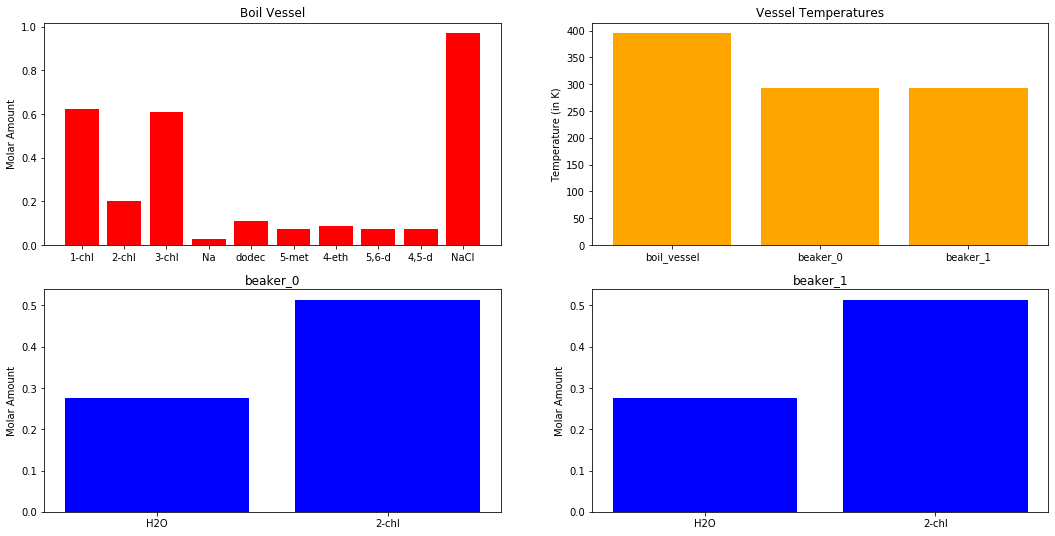

-------boil_vessel: change_heat (event)-------
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-----------------------------------------
total_steps:  1
reward: 0.00 
total reward: 0.00 
Temperature of boiling vessel: 480.9   K 

-------boil_vessel: change_heat (event)-------
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-----------------------------------------
total_steps:  2
reward: 0.00 
total reward: 0.00 
Temperature of boiling vessel: 481.1   K 

-------beaker_0: pour by volume (event)-------
-------beaker_1: update material dict (feedback_event)-------
-------beaker_1: update solute dict (feedback_event)-------
-------beaker_1: fully mix (feedback_event)-------
-------b

In [7]:
while not done:

    action = np.zeros(env.action_space.shape[0])

    if total_steps == 0:
        action = np.array([0,100])
    elif total_steps == 1:
        action = np.array([0,95])
    elif total_steps == 2:
        action = np.array([0,8])
    elif total_steps == 3:
        action = np.array([2,10])
    elif total_steps == 4:
        action = np.array([0,10])
    elif total_steps == 5:
        action = np.array([0,10])
    elif total_steps == 6:
        action = np.array([5,0])



    # perform the action and update the reward
    state, reward, done, __ = env.step(action)
    print('-----------------------------------------')
    print('total_steps: ', total_steps)
    print('reward: %.2f ' % reward)
    total_reward += reward
    print('total reward: %.2f ' % total_reward)
    print('Temperature of boiling vessel: %.1f ' % env.boil_vessel.temperature, ' K \n')
    # print(state)


    # render the plot
    env.render(mode=render_mode)
    # sleep(1)

    #increment one step
    total_steps += 1